For detailed information about the dataset and its respective preparation and/or Principal Component Analysis please look at 'Titanic(age_by_mean)_PCA_LogisticRegression'.
In this file I will skip each step explained in that file and will talk about only the things not covered in it.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
df = pd.read_csv('Data/titanic_train.csv')

In [2]:
df = df.drop(['Name','Ticket','Cabin'], axis=1)

In [3]:
df.loc[:,"Age"].median()


28.0

In [4]:
df["Age"].fillna(28, inplace = True)

In [5]:
df.dropna(inplace=True)

In [6]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [7]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [8]:
X=df.drop('Survived',axis=1)
X_renamed = X.rename(columns={'SibSp': 'Num Siblings/Spoused','Parch':'Num Parents/Children'})
y=df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_renamed, y, test_size=0.3,random_state=2)

I will import Multi-layer Perceptron classifier library and do a quick analysis, sticking to the number of neurons with a single hidden layer. The goal here is just to compare a more complex approach with other simpler approaches on a simple dataframe.

In [9]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(random_state=2)#default 100 neurons
MLP.fit(X_train, y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=2, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [10]:
y_pred = MLP.predict(X_test)

              precision    recall  f1-score   support

           0       0.70      0.93      0.80       170
           1       0.71      0.30      0.42        97

    accuracy                           0.70       267
   macro avg       0.70      0.61      0.61       267
weighted avg       0.70      0.70      0.66       267



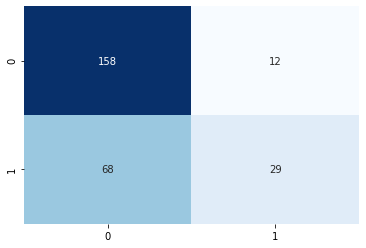

In [11]:
cfm = confusion_matrix(y_test,y_pred)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')
print(classification_report(y_test, y_pred))

In [12]:
Score = round(MLP.score(X_train, y_train) * 100, 2)
Score

69.13

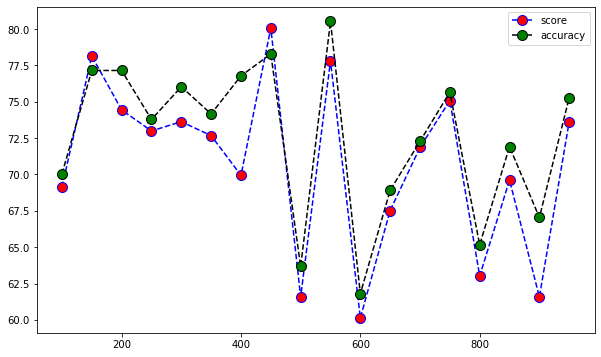

The maximum score found was: 80.06 with  450 neurons .
The maximum accuracy found was: 80.52 with  550 neurons .


In [17]:
score = []
accuracy = []
for i in range (100,1000,50):
    MLP = MLPClassifier(hidden_layer_sizes=(i, ),random_state=2)
    MLP.fit(X_train, y_train)
    y_pred = MLP.predict(X_test)
    score.append(round(MLP.score(X_train, y_train) * 100, 2))
    accuracy.append(round(accuracy_score(y_test, y_pred) * 100, 2))
plt.figure(figsize=(10,6))
plt.plot(range(100,1000,50),score,label='score',color='blue',linestyle='dashed',marker='o', markerfacecolor='red',markersize=10)
plt.plot(range(100,1000,50),accuracy,label='accuracy',color='black',linestyle='dashed',marker='o', markerfacecolor='green',markersize=10)
plt.legend(loc='best')
plt.show()

neurons_score = score.index(max(score))*50 + 100
print('The maximum score found was:',max(score), 'with ',neurons_score,'neurons','.')  
 

neurons_accuracy = accuracy.index(max(accuracy))*50 + 100
print('The maximum accuracy found was:',max(accuracy), 'with ',neurons_accuracy,'neurons','.')   

Both the 450 and 550 neurons seem an appropriate choice, so I will go with the smaller number.

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       170
           1       0.71      0.69      0.70        97

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.78      0.78      0.78       267



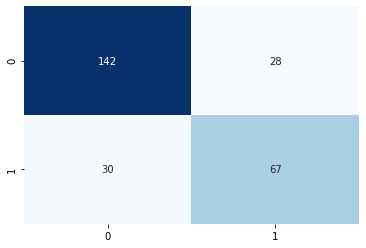

In [14]:
MLP = MLPClassifier(hidden_layer_sizes=(450, ),random_state=2)
MLP.fit(X_train, y_train)
y_pred = MLP.predict(X_test)
cfm = confusion_matrix(y_test,y_pred)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')
print(classification_report(y_test, y_pred))

In [15]:
Score = round(MLP.score(X_train, y_train) * 100, 2)
Score

80.06